In [1]:
import os
import shutil
import folium
import zipfile
import numpy as np
import pandas as pd
import geopandas as gpd
import mapclassify as mc
import matplotlib.pyplot as plt

from tqdm  import tqdm
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from mpl_toolkits.axes_grid1 import make_axes_locatable

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
font = {'family' : 'Trebuchet MS',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

In [3]:
df_agregado = pd.read_excel('TCC - Dados CE FNE.xlsx', sheet_name = 'agregado')

In [4]:
df_agregado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83964 entries, 0 to 83963
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ano                     83964 non-null  int64  
 1   cod_ibge                83964 non-null  int64  
 2   uf_x                    83964 non-null  object 
 3   regiao                  83964 non-null  object 
 4   programa                83964 non-null  object 
 5   finalidade              83964 non-null  object 
 6   nm_ar_cdr               83964 non-null  object 
 7   setor                   83964 non-null  object 
 8   atividade               83964 non-null  object 
 9   produto                 83964 non-null  object 
 10  tipo_pessoa             83964 non-null  object 
 11  genero                  80218 non-null  object 
 12  categoria_modificado    83964 non-null  object 
 13  tipo_pndr_2007          83964 non-null  object 
 14  tipo_pndr_2018          83964 non-null

In [5]:
ce = gpd.read_file('CE_Municipios_2020.dbf')
ce.rename(columns  = {'CD_MUN': 'cod_ibge'}, inplace = True)
ce['cod_ibge'] = ce['cod_ibge'].astype(int)

In [6]:
ce_agregado_merge = ce.merge(df_agregado, how = 'inner', on = 'cod_ibge')

In [7]:
drop_list = ['AREA_KM2', 'deflator_corre_nominal', 
             'Alta Renda', 'Baixa Renda',
             'Dinâmica', 'Estagnada']

ce_agregado_merge.drop(drop_list, axis = 1, inplace = True)

In [8]:
ce_agregado_merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 83964 entries, 0 to 83963
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   cod_ibge              83964 non-null  int32   
 1   NM_MUN                83964 non-null  object  
 2   SIGLA_UF              83964 non-null  object  
 3   geometry              83964 non-null  geometry
 4   ano                   83964 non-null  int64   
 5   uf_x                  83964 non-null  object  
 6   regiao                83964 non-null  object  
 7   programa              83964 non-null  object  
 8   finalidade            83964 non-null  object  
 9   nm_ar_cdr             83964 non-null  object  
 10  setor                 83964 non-null  object  
 11  atividade             83964 non-null  object  
 12  produto               83964 non-null  object  
 13  tipo_pessoa           83964 non-null  object  
 14  genero                80218 non-null  object  

In [9]:
ce_agregado = ce_agregado_merge.dissolve(by = ['cod_ibge'], aggfunc = 'sum')

In [10]:
ce_agregado.reset_index(inplace = True)

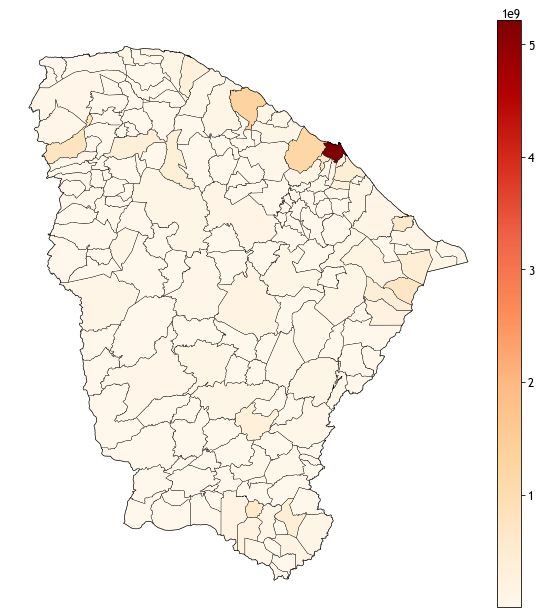

In [11]:
fig, ax = plt.subplots(figsize = (19.20, 10.80))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = 0.1)
ce.plot(ax = ax, color = 'white', edgecolor = 'black', zorder = 1)
ce_agregado.plot(ax = ax, cax = cax, column = 'valor_ctr_corrigido', 
             cmap = 'OrRd', zorder = 2, 
             edgecolor = 'black', linewidth = 0.3,
             legend = True, legend_kwds = {'orientation': 'vertical'})

ax.set(title = '')
ax.set_axis_off()

plt.savefig(fname = 'valor_ctr_corrigido.png', dpi = 1200, bbox_inches = 'tight',  
            edgecolor = 'black', transparent = True)

plt.show()

In [12]:
no_fort = ce_agregado[ce_agregado['cod_ibge'] != 2304400]

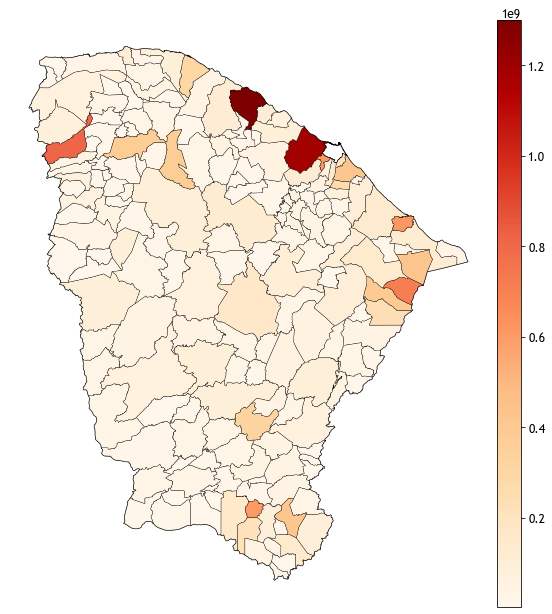

In [13]:
fig, ax = plt.subplots(figsize = (19.20, 10.80))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = 0.1)
ce.plot(ax = ax, color = 'white', edgecolor = 'black', zorder = 1)
no_fort.plot(ax = ax, cax = cax, column = 'valor_ctr_corrigido', 
             cmap = 'OrRd', zorder = 2, 
             edgecolor = 'black', linewidth = 0.3,
             legend = True, legend_kwds = {'orientation': 'vertical'})

ax.set(title = '')
ax.set_axis_off()

plt.savefig(fname = 'valor_ctr_corrigido_no_fort.png', dpi = 1200, bbox_inches = 'tight',  
            edgecolor = 'black', transparent = True)

plt.show()

In [14]:
ce_agregado_ibge = ce_agregado_merge.dissolve(by = ['cod_ibge', 'ano'], aggfunc = 'sum')

In [15]:
ce_agregado_ibge.reset_index(inplace = True)

In [52]:
ce_2021 = ce_agregado_ibge[ce_agregado_ibge['ano'] == 2021]

In [56]:
ce_2021

,cod_ibge,ano,geometry,cod_ibge_formula,qtd_ctr,valor_ctr,populacao,valor_ctr_corrigido
5,2300101,2021,"POLYGON ((-39.06308 -7.28274, -39.06233 -7.283...",73603232,216.000,1685761.590,382880,1685761.590
11,2300150,2021,"POLYGON ((-38.65182 -4.15933, -38.65147 -4.159...",46003000,30.000,2034619.870,302800,2034619.870
17,2300200,2021,"POLYGON ((-40.28833 -2.80909, -40.28494 -2.809...",163314200,331.000,46326302.010,4512476,46326302.010
23,2300309,2021,"POLYGON ((-39.14355 -5.96025, -39.14318 -5.961...",239232136,1211.000,16198741.860,5687448,16198741.860
29,2300408,2021,"POLYGON ((-40.11298 -6.34884, -40.11231 -6.349...",87415504,426.000,3459273.950,668192,3459273.950
...,...,...,...,...,...,...,...,...
1079,2313807,2021,"POLYGON ((-39.47187 -3.65032, -39.51457 -3.669...",78669438,123.000,1257360.150,755582,1257360.150
1085,2313906,2021,"POLYGON ((-40.70109 -3.24041, -40.69245 -3.242...",127264830,249.000,11982911.680,769340,11982911.680
1091,2313955,2021,"POLYGON ((-40.43017 -4.14215, -40.42992 -4.142...",104127975,115.000,2592361.390,833400,2592361.390
1097,2314003,2021,"POLYGON ((-39.23619 -6.58541, -39.23661 -6.585...",136526177,484.000,6802428.230,2423602,6802428.230


In [55]:
ce_2021.groupby('cod_ibge').sum().sort_values(by = 'valor_ctr_corrigido', ascending = False)

,ano,cod_ibge_formula,qtd_ctr,valor_ctr,populacao,valor_ctr_corrigido
cod_ibge,,,,,,
2307007,2021,281454854,1125.000,380220642.310,4143120,380220642.310
2304400,2021,2039394000,1811.999,376085142.190,2392501035,376085142.190
2307650,2021,244610900,134.000,121999069.330,24484516,121999069.330
2307304,2021,632201296,466.000,119602920.570,76244336,119602920.570
2306256,2021,59962656,30.000,91230842.450,1005186,91230842.450
...,...,...,...,...,...,...
2309904,2021,48507984,59.000,493444.000,137865,493444.000
2312502,2021,55500048,49.000,462414.360,181368,462414.360
2300507,2021,55212168,58.000,461492.030,284304,461492.030


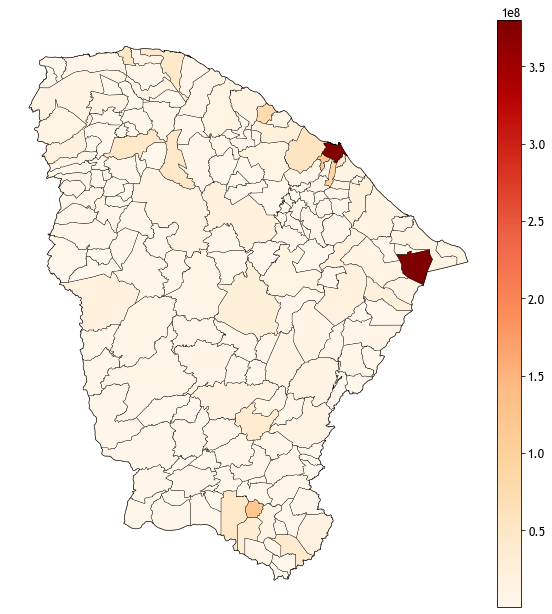

In [51]:
fig, ax = plt.subplots(figsize = (19.20, 10.80))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = 0.1)
ce.plot(ax = ax, color = 'white', edgecolor = 'black', zorder = 1)
ce_2021.plot(ax = ax, cax = cax, column = 'valor_ctr_corrigido', 
             cmap = 'OrRd', zorder = 2, 
             edgecolor = 'black', linewidth = 0.3,
             legend = True, legend_kwds = {'orientation': 'vertical'})

ax.set(title = '')
ax.set_axis_off()

plt.savefig(fname = 'valor_ctr_corrigido_2020.png', dpi = 1200, bbox_inches = 'tight',  
            edgecolor = 'black', transparent = True)

plt.show()

In [61]:
no_fort_2021 = ce_2021[ce_2021['cod_ibge'] != 2304400]

In [62]:
no_fort_2021

,cod_ibge,ano,geometry,cod_ibge_formula,qtd_ctr,valor_ctr,populacao,valor_ctr_corrigido
5,2300101,2021,"POLYGON ((-39.06308 -7.28274, -39.06233 -7.283...",73603232,216.000,1685761.590,382880,1685761.590
11,2300150,2021,"POLYGON ((-38.65182 -4.15933, -38.65147 -4.159...",46003000,30.000,2034619.870,302800,2034619.870
17,2300200,2021,"POLYGON ((-40.28833 -2.80909, -40.28494 -2.809...",163314200,331.000,46326302.010,4512476,46326302.010
23,2300309,2021,"POLYGON ((-39.14355 -5.96025, -39.14318 -5.961...",239232136,1211.000,16198741.860,5687448,16198741.860
29,2300408,2021,"POLYGON ((-40.11298 -6.34884, -40.11231 -6.349...",87415504,426.000,3459273.950,668192,3459273.950
...,...,...,...,...,...,...,...,...
1079,2313807,2021,"POLYGON ((-39.47187 -3.65032, -39.51457 -3.669...",78669438,123.000,1257360.150,755582,1257360.150
1085,2313906,2021,"POLYGON ((-40.70109 -3.24041, -40.69245 -3.242...",127264830,249.000,11982911.680,769340,11982911.680
1091,2313955,2021,"POLYGON ((-40.43017 -4.14215, -40.42992 -4.142...",104127975,115.000,2592361.390,833400,2592361.390
1097,2314003,2021,"POLYGON ((-39.23619 -6.58541, -39.23661 -6.585...",136526177,484.000,6802428.230,2423602,6802428.230


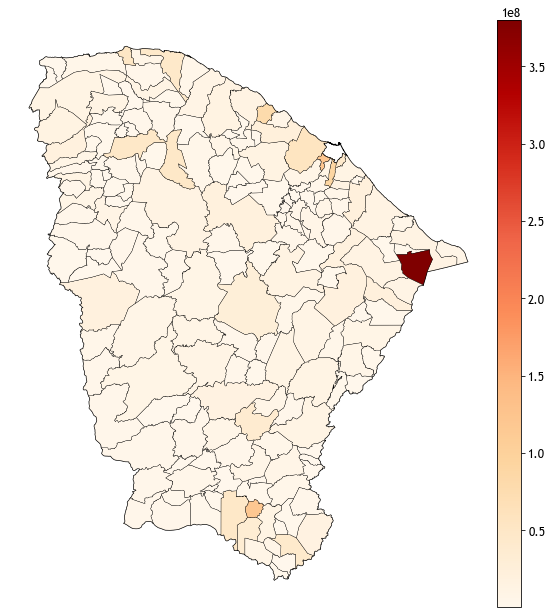

In [63]:
fig, ax = plt.subplots(figsize = (19.20, 10.80))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = 0.1)
ce.plot(ax = ax, color = 'white', edgecolor = 'black', zorder = 1)
no_fort_2021.plot(ax = ax, cax = cax, column = 'valor_ctr_corrigido', 
             cmap = 'OrRd', zorder = 2, 
             edgecolor = 'black', linewidth = 0.3,
             legend = True, legend_kwds = {'orientation': 'vertical'})

ax.set(title = '')
ax.set_axis_off()

plt.savefig(fname = 'valor_ctr_corrigido_no_fort_2020.png', dpi = 1200, bbox_inches = 'tight',  
            edgecolor = 'black', transparent = True)

plt.show()

In [20]:
ce_agregado_regiao = ce_agregado_merge.dissolve(by = ['cod_ibge', 'regiao'], aggfunc = 'sum')

In [21]:
ce_agregado_regiao.reset_index(inplace = True)

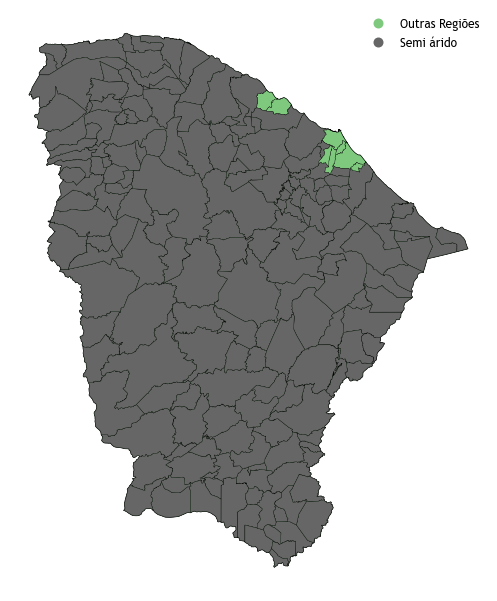

In [22]:
fig, ax = plt.subplots(figsize = (19.20, 10.80))
ce.plot(ax = ax, color = 'white', edgecolor = 'black', zorder = 1)
ce_agregado_regiao.plot(ax = ax, column = 'regiao', 
             cmap = 'Accent', zorder = 2, 
             edgecolor = 'black', linewidth = 0.3,
             categorical = True,
             legend = True, legend_kwds = dict(loc = 'upper right', frameon = False))

ax.set(title = '')
ax.set_axis_off()

plt.savefig(fname = 'regiao.png', dpi = 1200, bbox_inches = 'tight',  
            edgecolor = 'black', transparent = True)

plt.show()

In [23]:
ce_agregado_pndr_2007 = ce_agregado_merge.dissolve(by = ['cod_ibge', 'tipo_pndr_2007', ], aggfunc = 'sum')

In [24]:
ce_agregado_pndr_2007.reset_index(inplace = True)

In [25]:
ce_agregado_pndr_2007['tipo_pndr_2007'].value_counts()

Baixa Renda    111
Estagnada       37
Dinâmica        27
Alta Renda       9
Name: tipo_pndr_2007, dtype: int64

In [26]:
ce_agregado_pndr_2007['tipo_pndr_2007_or'] = ce_agregado_pndr_2007['tipo_pndr_2007']

In [27]:
ce_agregado_pndr_2007['tipo_pndr_2007_or'].replace({'Baixa Renda':'4 - Baixa Renda',
                                                    'Estagnada':  '3 - Estagnada',
                                                    'Dinâmica':   '2 - Dinâmica',
                                                    'Alta Renda': '1 - Alta Renda'}, inplace = True)

In [28]:
ce_agregado_pndr_2007['tipo_pndr_2007_or'].value_counts()

4 - Baixa Renda    111
3 - Estagnada       37
2 - Dinâmica        27
1 - Alta Renda       9
Name: tipo_pndr_2007_or, dtype: int64

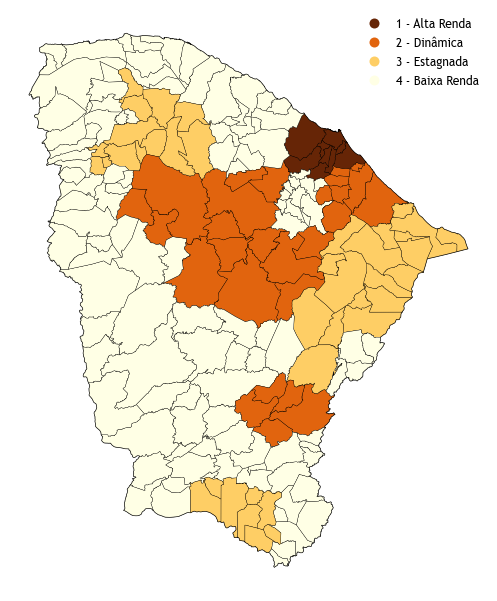

In [29]:
fig, ax = plt.subplots(figsize = (19.20, 10.80))
ce.plot(ax = ax, color = 'white', edgecolor = 'black', zorder = 1)
ce_agregado_pndr_2007.plot(ax = ax, column = 'tipo_pndr_2007_or', 
             cmap = 'YlOrBr_r', zorder = 2, 
             edgecolor = 'black', linewidth = 0.3,
             categorical = True,
             legend = True, legend_kwds = dict(frameon = False))

leg = ax.get_legend()
leg.set_bbox_to_anchor((0, 0, 1, 1))

ax.set(title = '')
ax.set_axis_off()

plt.savefig(fname = 'PNDR_2007.png', dpi = 1200, bbox_inches = 'tight',  
            edgecolor = 'black', transparent = True)

plt.show()

In [30]:
ce_agregado_pndr_2018 = ce_agregado_merge.dissolve(by = ['cod_ibge', 'tipo_pndr_2018'], aggfunc = 'sum')

In [31]:
ce_agregado_pndr_2018.reset_index(inplace = True)

In [32]:
ce_agregado_pndr_2018['tipo_pndr_2018'].value_counts()

Baixa Renda e Médio Dinamismo    63
Média Renda e Médio Dinamismo    62
Baixa Renda e Alto Dinamismo     18
Média Renda e Alto Dinamismo     16
Baixa Renda e Baixo Dinamismo    11
Alta Renda e Médio Dinamismo      9
Média Renda e Baixo Dinamismo     5
Name: tipo_pndr_2018, dtype: int64

In [33]:
ce_agregado_pndr_2018['tipo_pndr_2018_or'] = ce_agregado_pndr_2018['tipo_pndr_2018']

In [34]:
ce_agregado_pndr_2018['tipo_pndr_2018_or'].replace({'Baixa Renda e Baixo Dinamismo': '7 - Baixa Renda e Baixo Dinamismo',
                                                    'Baixa Renda e Médio Dinamismo': '6 - Baixa Renda e Médio Dinamismo',
                                                    'Baixa Renda e Alto Dinamismo':  '5 - Baixa Renda e Alto Dinamismo',
                                                    'Média Renda e Baixo Dinamismo': '4 - Média Renda e Baixo Dinamismo', 
                                                    'Média Renda e Médio Dinamismo': '3 - Média Renda e Médio Dinamismo',
                                                    'Média Renda e Alto Dinamismo':  '2 - Média Renda e Alto Dinamismo',
                                                    'Alta Renda e Médio Dinamismo':  '1 - Alta Renda e Médio Dinamismo',
                                                     }, inplace = True)

In [35]:
ce_agregado_pndr_2018['tipo_pndr_2018_or'].value_counts()

6 - Baixa Renda e Médio Dinamismo    63
3 - Média Renda e Médio Dinamismo    62
5 - Baixa Renda e Alto Dinamismo     18
2 - Média Renda e Alto Dinamismo     16
7 - Baixa Renda e Baixo Dinamismo    11
1 - Alta Renda e Médio Dinamismo      9
4 - Média Renda e Baixo Dinamismo     5
Name: tipo_pndr_2018_or, dtype: int64

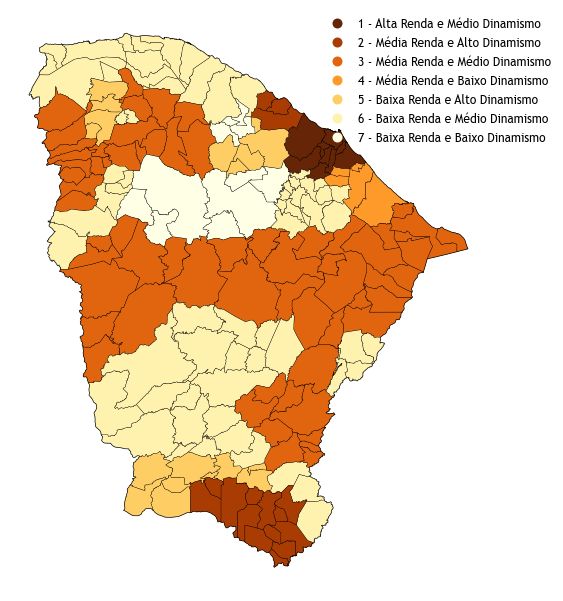

In [36]:
fig, ax = plt.subplots(figsize = (19.20, 10.80))
ce.plot(ax = ax, color = 'white', edgecolor = 'black', zorder = 1)
ce_agregado_pndr_2018.plot(ax = ax, column = 'tipo_pndr_2018_or', 
             cmap = 'YlOrBr_r', zorder = 2, 
             edgecolor = 'black', linewidth = 0.3,
             categorical = True,
             legend = True, legend_kwds = dict(frameon = False))

leg = ax.get_legend()
leg.set_bbox_to_anchor((0, 0, 1.15, 1))

ax.set(title = '')
ax.set_axis_off()

plt.savefig(fname = 'PNDR_2018', dpi = 1200, bbox_inches = 'tight',  
            edgecolor = 'black', transparent = True)

plt.show()

In [37]:
with pd.ExcelWriter('TCC - Mapas CE FNE.xlsx') as writer:  
    ce_agregado_merge.to_excel(writer, sheet_name = 'base')
    ce_agregado_ibge.to_excel(writer, sheet_name = 'ibge')
    ce_agregado_regiao.to_excel(writer, sheet_name = 'regiao')
    ce_agregado_pndr_2007.to_excel(writer, sheet_name = 'PNDR 2007')
    ce_agregado_pndr_2018.to_excel(writer, sheet_name = 'PNDR 2018')

cmap: 

Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r